# MLME Miniproject - Dina Elmazi

FIND THE ORIGINAL DATASET ON THE UCI MACHINE LEARNING WEBSITE:

https://archive.ics.uci.edu/dataset/320/student+performance


YOU CAN ALSO FIND A DATASET CARD FOR THE DATA HERE ON HUGGING TREE:

https://huggingface.co/datasets/DElmazi/Student_Performance

## Importing + Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
dMath = pd.read_csv("student-mat.csv",sep=";",header=0)
dPort = pd.read_csv("student-por.csv",sep=";",header=0)

## Merging Math & Portugese Class Data

Having received information regarding the datasets and available students across both datasets, we can cross-reference information from both datasets to combine them and draw out the most important information and categories from both datasets that we wish to explore further. The primary factors of interested being related to age, gender, address, their reason for choosing their school, their study time, internet, traveltime, and grades for both Math and Portugese.

In [3]:
#Using the information provided by the dataset .txt guide, we can combine the two data sets to provide us the combined data of 382 students that have both mathematics and portugese.
combinedStudentData = pd.merge(dMath,dPort,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","studytime","traveltime"])
dataCategories = ["sex","age","address","reason","studytime","internet","traveltime","G1_x","G2_x","G3_x","G1_y","G2_y","G3_y"]
studentData = combinedStudentData.loc[:, dataCategories]
studentData.head(10)

,sex,age,address,reason,studytime,internet,traveltime,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
0,F,18,U,course,2,no,2,5,6,6,0,11,11
1,F,17,U,course,2,yes,1,5,5,6,9,11,11
2,F,15,U,other,2,yes,1,7,8,10,12,13,12
3,F,15,U,home,3,yes,1,15,14,15,14,14,14
4,F,16,U,home,2,no,1,6,10,10,11,13,13
5,M,16,U,reputation,2,yes,1,15,15,15,12,12,13
6,M,16,U,home,2,yes,1,12,12,11,13,12,13
7,F,17,U,home,2,no,2,6,5,6,10,13,13
8,M,15,U,home,2,yes,1,16,18,19,15,16,17
9,M,15,U,home,2,yes,1,14,15,15,12,12,13


## Data Preprocessing

Important aspects of preprocessing data to prepare for performing linear regression, is handling missing values, standardizing data, encoding ordinal and nominal variables and checking linearbility. Seeing as we wish to find a coherence between the amount of studying, and how it affects the mean of their grades, we will be standardizing and scatterplotting the data.

In [4]:
from sklearn.preprocessing import StandardScaler
mathGradeCategories = ["G1_x", "G2_x","G3_x"]
portGradeCategories = ["G1_y","G2_y","G3_y"]

studentData["standMath"] = StandardScaler().fit_transform(studentData[mathGradeCategories]).mean(axis=1)
studentData["standPort"] = StandardScaler().fit_transform(studentData[portGradeCategories]).mean(axis=1)

## Data Visualization

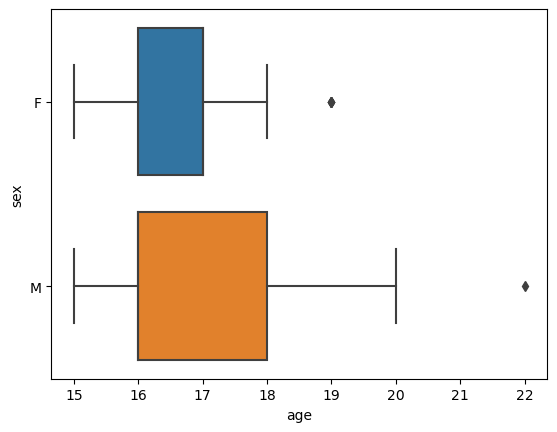

In [5]:
sns.boxplot(x='age', y='sex', data=combinedStudentData)
plt.show()

<Axes: >

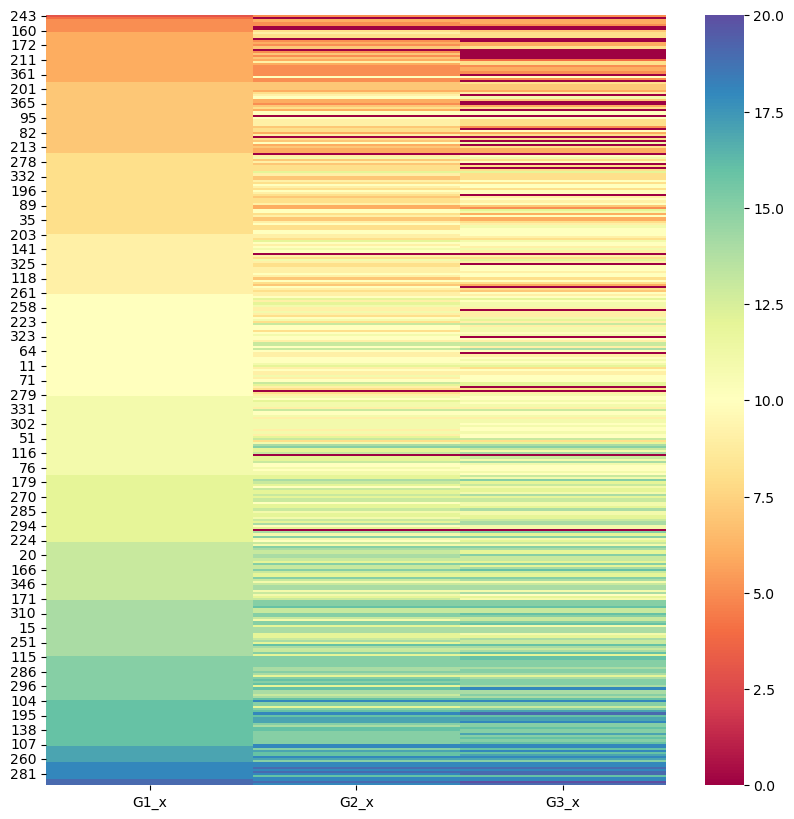

In [6]:
select_catMath = ["G1_x","G2_x","G3_x"]
heatmapStudentDataMath = combinedStudentData.loc[:,select_catMath]
sortedMathHeatmap = heatmapStudentDataMath.sort_values(by='G1_x')

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(sortedMathHeatmap, cmap="Spectral")

<Axes: >

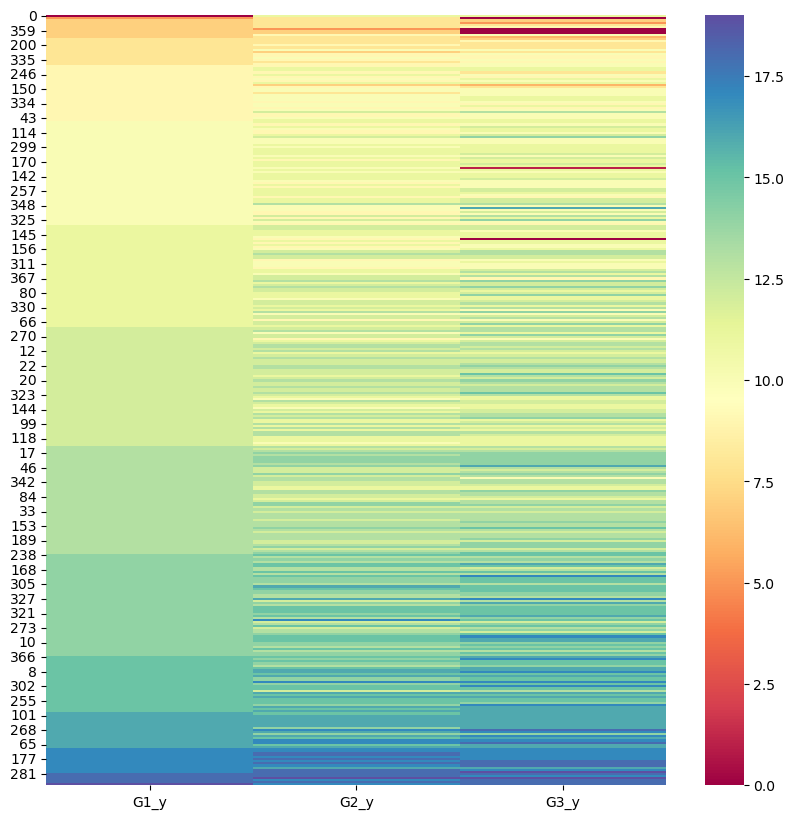

In [7]:
select_catPort = ["G1_y","G2_y","G3_y"]
heatmapPortData = combinedStudentData.loc[:,select_catPort]
sortedPortHeatmap = heatmapPortData.sort_values(by='G1_y')

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(sortedPortHeatmap, cmap="Spectral")

c:\Users\dinac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


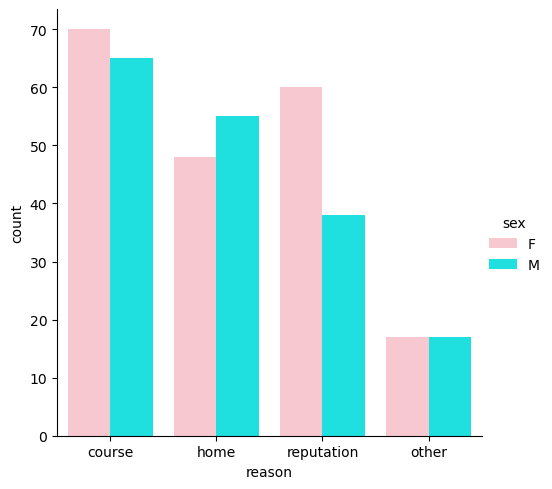

In [8]:
select_genderRep = ["sex","reason"]
genderRepData = combinedStudentData.loc[:,select_genderRep]
sortedGenderRepData = genderRepData['reason'].value_counts().sort_values(ascending=False)

palette = {
    'F': 'pink',
    'M': 'cyan'
}

sns.catplot(
    data=genderRepData, x="reason", hue="sex", kind="count", palette=palette, order=sortedGenderRepData.index
)

<Axes: xlabel='studytime', ylabel='standMath'>

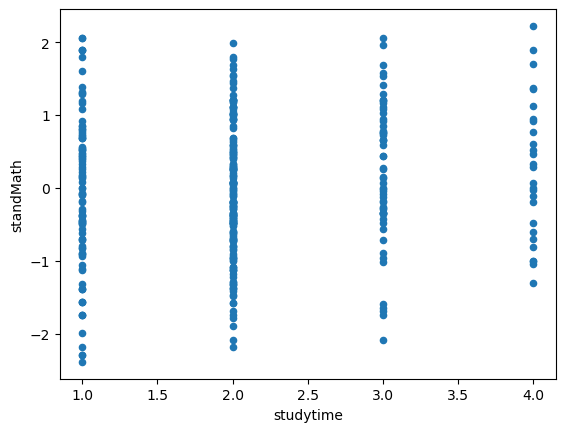

In [9]:
studentData.plot.scatter('studytime','standMath')

<Axes: xlabel='studytime', ylabel='standPort'>

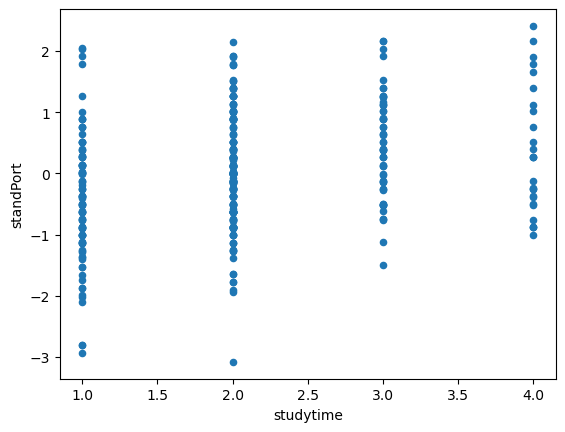

In [10]:
studentData.plot.scatter('studytime','standPort')

## Finding Correlation

In [11]:
print(studentData["standMath"].corr(studentData["studytime"]))
print(studentData["standPort"].corr(studentData["studytime"]))

0.11623356795870536
0.2785157409537162


Seems like there exists a correlation between the amount of studying and the collective mean between grades received in their respective courses, with the correlation coefficient for the grades in the Portugese course being above 2.

## Data Splitting - Test Set and Training Set

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [13]:
X = studentData["studytime"].to_numpy().reshape(-1,1)
y = studentData["standPort"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean Squared Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean Squared Error: 0.922 (-4.03e+03%)


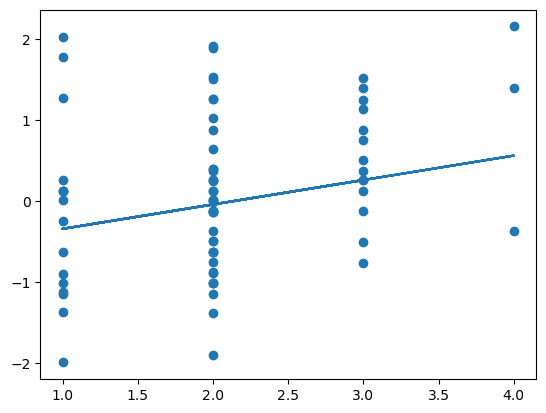

In [14]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)